In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle
import glob
import dtw

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.


In [2]:
# Load the data

milp_data = pickle.load(open('./results/results.pkl', 'rb'))

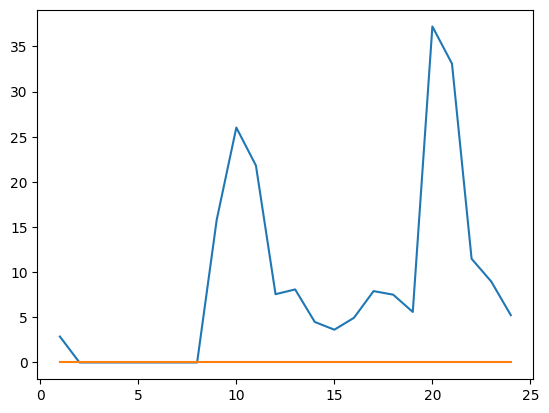

In [3]:
plt.plot(milp_data['2019-01-01']['imports'])
plt.plot(milp_data['2019-01-01']['exports'])

In [57]:
# Check MILP data

milp_data['2019-01-01'].keys()

dict_keys(['genPower', 'genExcessPower', 'imports', 'exports', 'loadReducePower', 'loadCutPower', 'loadEnsPower', 'storageDischargePower', 'storageChargePower', 'storageState', 'v2gDischargePower', 'v2gChargePower', 'v2gState'])

In [48]:
# Load the sequential data

sequential_data = {}
for file in glob.glob('scenarios/sequential_testing/results/sequential/*.csv'):
    data = pd.read_csv(file, index_col=0)
    name = file.split('/')[-1].split('.')[0].split('_')[1]
    sequential_data[name] = data

In [49]:
sequential_data['2019-01-01']

,generator_08,generator_06,generator_02,generator_09,generator_13,storage_01,storage_02,storage_03,ev_01,ev_02,ev_03,ev_04,ev_05,imports,exports
0,0.000000,0.000000,0.000000,0.000012,0.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.000000,0.000012
1,0.000000,0.001365,0.000000,0.000027,0.000000,0.787608,0.600000,0.864850,0.813116,0.912679,0.818258,0.860414,0.800000,0.000000,5.659424
2,0.000000,0.001458,0.000000,0.000025,0.000000,0.787608,0.400000,0.921541,0.852722,0.997217,0.818258,0.860414,0.860791,0.000000,5.338918
3,0.000000,0.001178,0.000000,0.000005,0.000000,0.647528,0.400000,0.921541,0.844037,0.997217,0.833552,0.879778,0.860791,0.000000,1.384647
4,0.000000,0.001430,0.000000,0.000008,0.000000,0.482612,0.480339,0.820917,0.824015,0.997217,0.833552,0.881556,0.870533,1.114352,0.000000
5,0.000000,0.001410,0.000000,0.000067,0.000000,0.482612,0.428285,0.820917,0.828803,0.997217,0.833552,0.881556,0.833838,0.000000,1.139811
6,0.000000,0.001405,0.000000,0.000012,0.000000,0.446455,0.428285,0.591036,0.844059,0.997217,0.833552,0.896511,0.833838,2.169589,0.000000
7,0.000000,0.001458,0.000000,0.000017,0.000000,0.246455,0.497237,0.591036,0.844059,0.986884,0.825045,0.896511,0.833838,1.178872,0.000000
8,0.000000,0.001438,0.000008,0.000110,0.003387,0.046455,0.560394,0.591036,0.832241,0.986884,0.825045,0.802567,0.833838,0.730727,0.000000
9,0.047292,0.010010,0.010902,0.020192,0.013912,0.046455,0.560394,0.591036,0.786482,1.000000,0.845928,0.817355,0.806519,2.109091,0.000000


In [29]:
# Regular RL

regular_data = {}
for file in glob.glob('scenarios/sequential_testing/results/multiagent/*.csv'):
    data = pd.read_csv(file, index_col=0)
    name = file.split('/')[-1].split('.')[0].split('_')[1]
    regular_data[name] = data

In [30]:
regular_data['2019-01-01']

,generator_08,generator_06,generator_02,generator_09,generator_13,ev_01,ev_02,ev_03,ev_04,ev_05,storage_01,storage_02,storage_03,aggregator,imports,exports
0,0.000000,0.001452,0.000000,0.000012,0.000000,0.800000,0.800000,0.800000,0.800000,0.816275,0.8,0.8,0.8,0.0,1.141008,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.8,0.8,0.8,0.0,0.000000,0.000000
2,0.000000,0.001458,0.000000,0.000025,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.8,0.8,0.8,0.0,0.000000,0.001483
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.8,0.8,0.8,0.0,0.000000,0.000000
4,0.000000,0.001430,0.000000,0.000008,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.8,0.8,0.8,0.0,0.000000,0.001438
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.8,0.8,0.8,0.0,0.000000,0.000000
6,0.000000,0.001405,0.000000,0.000012,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.8,0.8,0.8,0.0,0.000000,0.001417
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.8,0.8,0.8,0.0,0.000000,0.000000
8,0.000000,0.001438,0.000008,0.000110,0.003387,0.188182,0.200000,0.200000,0.106056,0.200000,0.8,0.8,0.8,0.0,0.000000,0.004943
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.8,0.8,0.8,0.0,0.000000,0.000000


In [59]:
# Dynamic Time Warping

def dtw_distance(x, y):
    return dtw.dtw(x, y, keep_internals=True).distance

# Build the dataframes

# Generators
dtw_gens = pd.DataFrame(index=milp_data.keys(), columns=['seq_02', 'seq_06', 'seq_08',
                                                         'seq_09', 'seq_13',
                                                         'reg_02', 'reg_06', 'reg_08',
                                                         'reg_09', 'reg_13'])
for date in milp_data.keys():

    dtw_gens.loc[date, 'seq_02'] = dtw_distance(milp_data[date]['genPower'].iloc[0,:],
                                                sequential_data[date]['generator_02'])
    dtw_gens.loc[date, 'seq_06'] = dtw_distance(milp_data[date]['genPower'].iloc[1,:],
                                                sequential_data[date]['generator_06'])
    dtw_gens.loc[date, 'seq_08'] = dtw_distance(milp_data[date]['genPower'].iloc[2,:],
                                                sequential_data[date]['generator_08'])
    dtw_gens.loc[date, 'seq_09'] = dtw_distance(milp_data[date]['genPower'].iloc[3,:],
                                                sequential_data[date]['generator_09'])
    dtw_gens.loc[date, 'seq_13'] = dtw_distance(milp_data[date]['genPower'].iloc[4,:],
                                                sequential_data[date]['generator_13'])
    
    # Generator 08
    dtw_gens.loc[date, 'reg_02'] = dtw_distance(milp_data[date]['genPower'].iloc[0,:],
                                                regular_data[date]['generator_02'])
    dtw_gens.loc[date, 'reg_06'] = dtw_distance(milp_data[date]['genPower'].iloc[1,:],
                                                regular_data[date]['generator_06'])
    dtw_gens.loc[date, 'reg_08'] = dtw_distance(milp_data[date]['genPower'].iloc[2,:],
                                                regular_data[date]['generator_08'])
    dtw_gens.loc[date, 'reg_09'] = dtw_distance(milp_data[date]['genPower'].iloc[3,:],
                                                regular_data[date]['generator_09'])
    dtw_gens.loc[date, 'reg_13'] = dtw_distance(milp_data[date]['genPower'].iloc[4,:],
                                                regular_data[date]['generator_13'])
    
# Storage
dtw_stor = pd.DataFrame(index=milp_data.keys(), columns=['seq_01', 'seq_02', 'seq_03',
                                                         'reg_01', 'reg_02', 'reg_03'])
for date in milp_data.keys():
    
    for stor in range(3):
        dtw_stor.loc[date, f'seq_0{stor+1}'] = dtw_distance(milp_data[date]['storageState'].iloc[stor,:],
                                                            sequential_data[date][f'storage_0{stor+1}'])
        dtw_stor.loc[date, f'reg_0{stor+1}'] = dtw_distance(milp_data[date]['storageState'].iloc[stor,:],
                                                            regular_data[date][f'storage_0{stor+1}'])

# EVs
dtw_evs = pd.DataFrame(index=milp_data.keys(), columns=['seq_01', 'seq_02', 'seq_03',
                                                         'seq_04', 'seq_05',
                                                         'reg_01', 'reg_02', 'reg_03',
                                                         'reg_04', 'reg_05'])
for date in milp_data.keys():
        
    for ev in range(5):
        dtw_evs.loc[date, f'seq_0{ev+1}'] = dtw_distance(milp_data[date]['v2gState'].iloc[ev,:],
                                                            sequential_data[date][f'ev_0{ev+1}'])
        dtw_evs.loc[date, f'reg_0{ev+1}'] = dtw_distance(milp_data[date]['v2gState'].iloc[ev,:],
                                                            regular_data[date][f'ev_0{ev+1}'])
        
# Imports and Exports
dtw_impexp = pd.DataFrame(index=milp_data.keys(), columns=['seq_imp', 'seq_exp', 
                                                           'reg_imp', 'reg_exp'])

for date in milp_data.keys():
    
    dtw_impexp.loc[date, 'seq_imp'] = dtw_distance(milp_data[date]['imports'],
                                                    sequential_data[date]['imports'])
    dtw_impexp.loc[date, 'seq_exp'] = dtw_distance(milp_data[date]['exports'],
                                                    sequential_data[date]['exports'])
    
    dtw_impexp.loc[date, 'reg_imp'] = dtw_distance(milp_data[date]['imports'],
                                                    regular_data[date]['imports'])
    dtw_impexp.loc[date, 'reg_exp'] = dtw_distance(milp_data[date]['exports'],
                                                    regular_data[date]['exports'])
    

In [60]:
dtw_gens

,seq_02,seq_06,seq_08,seq_09,seq_13,reg_02,reg_06,reg_08,reg_09,reg_13
2019-01-01,1.767386,0.001795,1.365238,0.483797,0.203111,1.663612,1.677667,2.013503,1.933125,1.960665
2019-01-02,12.515689,3.646403,11.952694,6.631888,1.874848,12.039704,4.563748,10.81086,12.8069,3.84506
2019-01-03,8.58385,1.287113,8.774668,3.974343,2.571977,9.76403,4.13773,8.710551,11.851327,3.479712
2019-01-04,5.024992,2.954415,3.795977,5.054406,0.85442,4.290368,3.672195,3.909257,8.7973,1.071323
2019-01-05,6.600062,1.197198,6.695022,2.883799,0.635528,7.362222,2.510484,6.259649,5.488982,0.780837
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,7.575733,3.71891,6.621302,9.836808,2.607785,8.012345,4.313248,9.800778,10.579747,5.454952
2020-12-28,2.846338,1.024773,2.846338,0.000002,8.702633,4.448225,2.160463,5.007248,4.762225,9.193007
2020-12-29,3.735785,0.660064,2.769648,6.246522,6.685967,3.254132,2.730977,4.39979,8.815928,8.172728
2020-12-30,6.538147,1.430365,5.84257,3.235737,9.91422,7.44689,4.551378,5.723576,8.277772,10.212492


In [56]:
dtw_gens.mean()

seq_02     9.746017
seq_06     3.368808
seq_08    11.122993
seq_09     7.574465
seq_13     3.035586
reg_02    10.064288
reg_06     4.953132
reg_08    10.715403
reg_09      10.4995
reg_13     4.003615
dtype: object

In [62]:
dtw_impexp.mean()

seq_imp    122.241067
seq_exp     39.325014
reg_imp      145.8568
reg_exp     30.828539
dtype: object